## Supplementary Figure 7

UMAP across dose

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

source("viz_themes.R")
source("plotting_functions.R")
source("data_functions.R")

In [2]:
output_figure_base <- file.path("figures", "supplementary", "supfigure7")
extensions <- c(".png", ".pdf")

In [3]:
results_dir <- file.path("../1.Data-exploration/Profiles_level4/")

cp_df <- load_embeddings_data(assay="cellpainting", results_dir = results_dir)
l1000_df <- load_embeddings_data(assay="l1000", results_dir = results_dir)

In [4]:
# Create compounds to highlight
moa_targets_size_values <- c(rep(1, length(moa_targets) -1), 0.1)
names(moa_targets_size_values) <- names(moa_targets)

moa_targets_alpha_values <- c(rep(0.5, length(moa_targets) - 1), 0.1)
names(moa_targets_alpha_values) <- names(moa_targets)

cp_df <- cp_df %>% dplyr::mutate(assay = "Cell Painting", highlight_moa = tolower(moa), dose = Metadata_dose_recode)
cp_df$highlight_moa[!(cp_df$highlight_moa %in% names(moa_targets))] <- "other"

l1000_df <- l1000_df %>% dplyr::mutate(assay = "L1000", highlight_moa = tolower(moa))
l1000_df$highlight_moa[!(l1000_df$highlight_moa %in% names(moa_targets))] <- "other"

embedding_df <- dplyr::bind_rows(cp_df, l1000_df) %>%
    dplyr::filter(!is.na(dose))
embedding_df$dose <- dplyr::recode_factor(paste(embedding_df$dose), !!!recode_dose_factor_controls)

print(dim(embedding_df))
tail(embedding_df, 3)

[1] 79670    25


Metadata_broad_sample,Metadata_pert_id,Metadata_Plate,Metadata_Well,Metadata_broad_id,Metadata_moa,Metadata_dose_recode,broad_id,pert_iname,moa,⋯,dmso_label,assay,highlight_moa,dose,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BRD-K60230970-001-10-0,NA,NA,NA,NA,NA,NA,NA,MG-132,Proteasome inhibitor,⋯,compound,L1000,proteasome inhibitor,Positive,REP.A028_A549_24H_X2_B29:O04,REP.A028_A549_24H:O04,BRD-K60230970,20 uM,REP.A028_A549_24H_X2_B29|REP.A028_A549_24H_X3_B29,O04
BRD-K60230970-001-10-0,NA,NA,NA,NA,NA,NA,NA,MG-132,Proteasome inhibitor,⋯,compound,L1000,proteasome inhibitor,Positive,REP.A028_A549_24H_X3_B29:O04,REP.A028_A549_24H:O04,BRD-K60230970,20 uM,REP.A028_A549_24H_X2_B29|REP.A028_A549_24H_X3_B29,O04
BRD-K60230970-001-10-0,NA,NA,NA,NA,NA,NA,NA,MG-132,Proteasome inhibitor,⋯,compound,L1000,proteasome inhibitor,Positive,REP.A028_A549_24H_X2_B29:O05,REP.A028_A549_24H:O05,BRD-K60230970,20 uM,REP.A028_A549_24H_X2_B29,O05


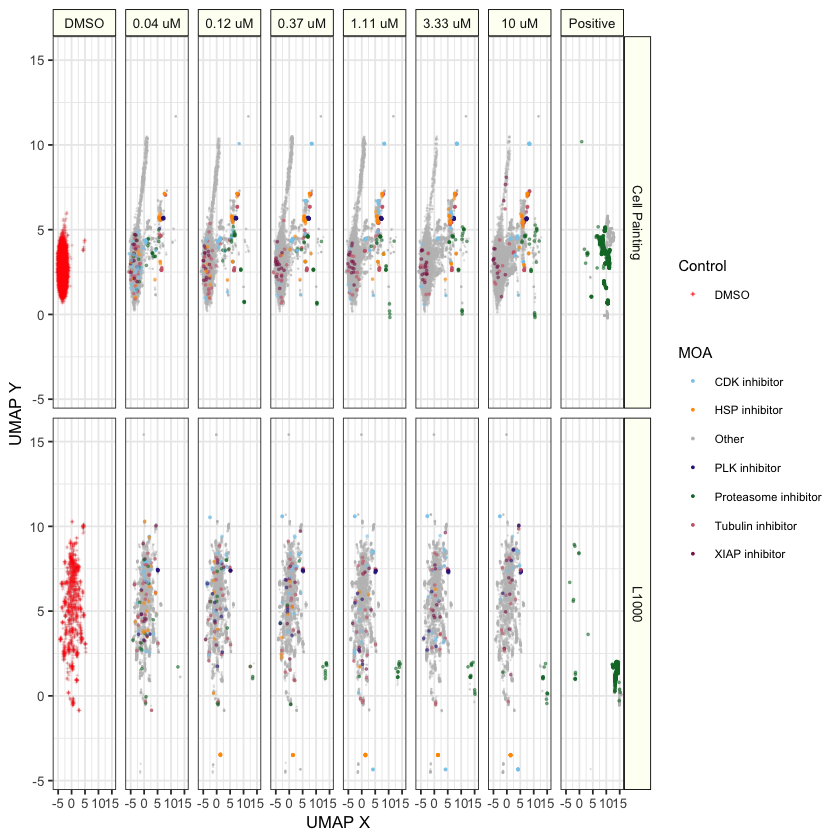

In [5]:
panel_a_gg <- (
    ggplot(data = NULL, aes(x = UMAP_0, y = UMAP_1, color = highlight_moa, size = highlight_moa, alpha = highlight_moa))
    + geom_point(data = embedding_df %>% dplyr::filter(highlight_moa == "other"), size = 0.05, alpha = 0.3)
    + geom_point(data = embedding_df %>% dplyr::filter(dmso_label == "DMSO"), size = 0.4, color = "red", alpha = 0.1, aes(shape = dmso_label))
    + geom_point(data = embedding_df %>% dplyr::filter(highlight_moa != "other"), size = 0.4)
    + figure_theme
    + facet_grid("assay~dose")
    + scale_size_manual("MOA", labels = moa_targets, values = moa_targets_size_values)
    + scale_alpha_manual("MOA", values = moa_targets_alpha_values)
    + scale_color_manual("MOA", labels = moa_targets, values = moa_colors)
    + scale_shape_manual("Control", values = c("DMSO" = 3))
    + xlab("UMAP X")
    + ylab("UMAP Y")
    + guides(alpha = FALSE, shape = guide_legend(override.aes = list(alpha = 0.8)))
)

panel_a_gg

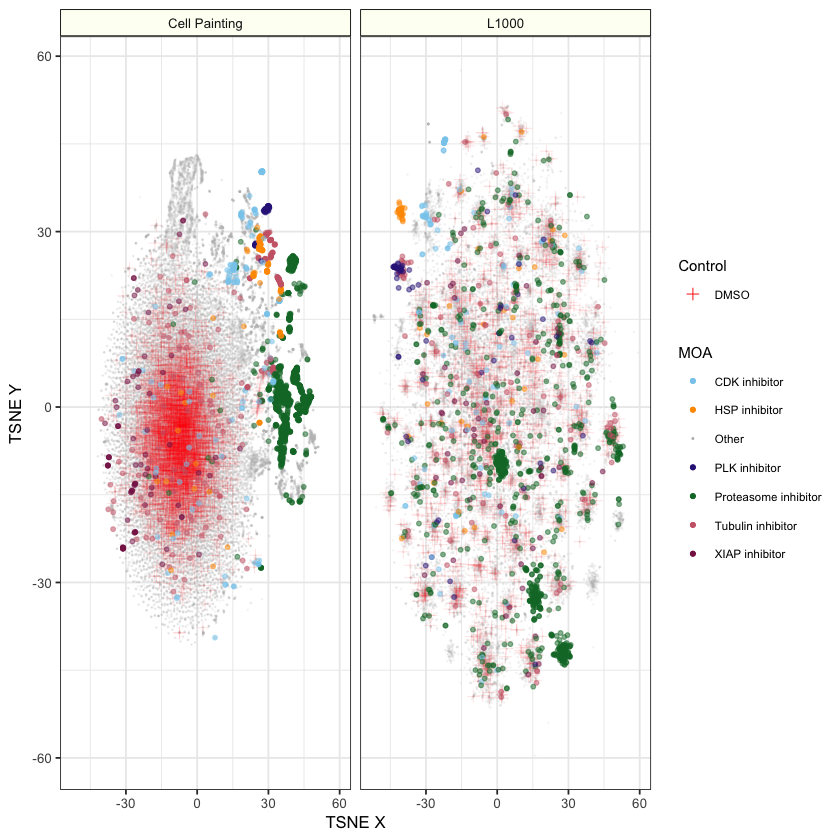

In [6]:
panel_b_gg <- (
    ggplot(data = NULL, aes(x = TSNE_0, y = TSNE_1, color = highlight_moa, size = highlight_moa, alpha = highlight_moa))
    + geom_point(data = embedding_df %>% dplyr::filter(highlight_moa == "other"))
    + geom_point(data = embedding_df %>% dplyr::filter(dmso_label == "DMSO"), size = 2, color = "red", alpha = 0.1, aes(shape = dmso_label))
    + geom_point(data = embedding_df %>% dplyr::filter(highlight_moa != "other"))
    + figure_theme
    + facet_grid("~assay")
    + scale_size_manual("MOA", labels = moa_targets, values = moa_targets_size_values)
    + scale_alpha_manual("MOA", values = moa_targets_alpha_values)
    + scale_color_manual("MOA", labels = moa_targets, values = moa_colors)
    + scale_shape_manual("Control", values = c("DMSO" = 3))
    + xlab("TSNE X")
    + ylab("TSNE Y")
    + guides(alpha = FALSE, shape = guide_legend(override.aes = list(alpha = 0.8)))
)

panel_b_gg

In [7]:
combined_legend <- cowplot::get_legend(panel_b_gg)

panel_a_gg <- panel_a_gg + theme(legend.position = "none") + labs(tag = "a")
panel_b_gg <- panel_b_gg + theme(legend.position = "none") + labs(tag = "b")

## Compile supplementary figure

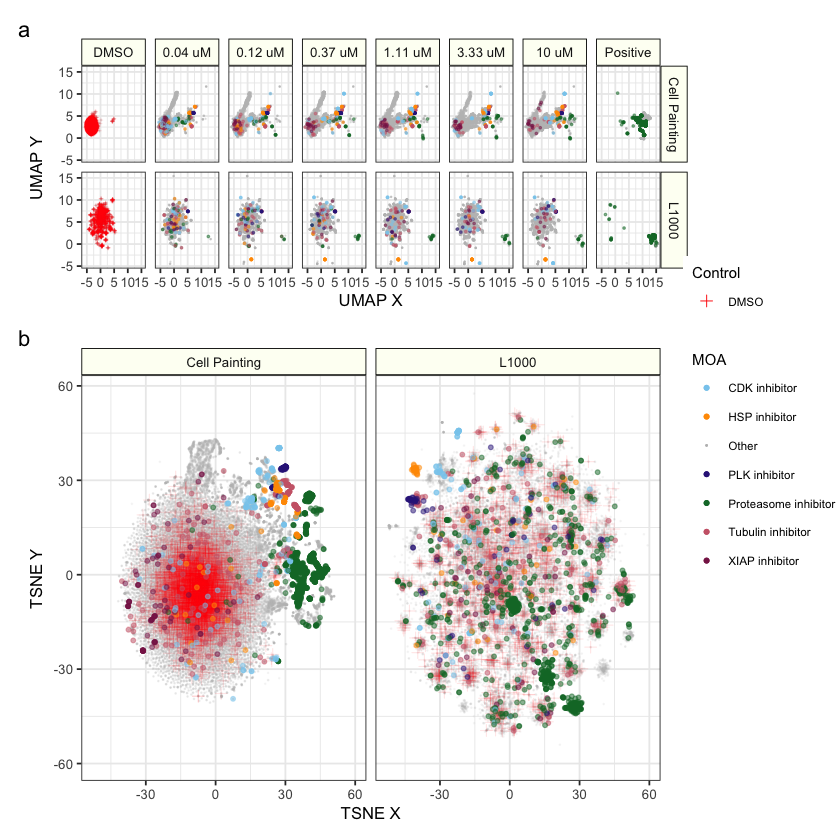

In [8]:
supfig5_gg <- (
    (
        (
            panel_a_gg /
            panel_b_gg
        )
    ) + plot_layout(heights = c(1, 2)) | (
        combined_legend
    )
) + plot_layout(widths = c(1, 0.2))

supfig5_gg

In [9]:
for (extension in extensions) {
    output_file <- paste0(output_figure_base, extension)
    ggplot2::ggsave(output_file, supfig5_gg, height = 8, width = 10, dpi = 500)
}